In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as pl #繪圖
import torch.nn.init as init

In [2]:
dtype = torch.FloatTensor
input_size = 7
hidden_size = 6
output_size = 1
epochs = 300
seq_length = 20 #輸入長度，RNN的序列，這數字來自於data要放入的長度
lr = 0.1 #學習率

In [3]:
data_time_steps = np.linspace(2, 10, seq_length + 1) #指定區間產生平均的數值，產生2~10共21個，畫圖區間使用

In [4]:
data = np.sin(data_time_steps) #轉sin

In [5]:
data.resize((seq_length + 1, 1))#調整成1行,21

In [6]:
x = Variable(torch.Tensor(data[:-1]).type(dtype), requires_grad=False)
y = Variable(torch.Tensor(data[1:]).type(dtype), requires_grad=False)

In [7]:
#初始化
w1 = torch.FloatTensor(input_size, hidden_size).type(dtype)
init.normal_(w1, 0.0, 0.4) # init.normal 舊版  mean=0.0, std=0.4 (低離散程度)
w1 =  Variable(w1, requires_grad=True) #requires_grad=True 需要反向傳播
w2 = torch.FloatTensor(hidden_size, output_size).type(dtype)
init.normal_(w2, 0.0, 0.4) # init.normal 舊版 mean=0.0, std=0.3 (低離散程度)
w2 = Variable(w2, requires_grad=True) #requires_grad=True 需要反向傳播
# w1作為輸入，w2最為輸出

In [12]:
def forward(input, context_state, w1, w2):
  xh = torch.cat((input, context_state), 1) #將input與context_state做連接，並成為列(Row)呈現
  context_state = torch.tanh(xh.mm(w1)) #先對w1作內積，相近的數值就接近，再轉換tanh收斂到-1~1
  out = context_state.mm(w2) #再對w2做內積作為輸出
  return  (out, context_state) #回傳context_state與out

In [9]:
for i in range(epochs):
  total_loss = 0
  #裝RNN的資料context_state
  context_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad=True)
    #起始為0  0  0  0  0  0 因為hidden_size設定為6
  for j in range(x.size(0)): #x.size(0)確保是正確數字
    input = x[j:(j+1)] #依序將0.9093、0.6755取出
    target = y[j:(j+1)] #依序將0.6755、0.3350、-0.0584、-0.4425取出
    (pred, context_state) = forward(input, context_state, w1, w2)
    #實際-預測 計算Loss MSE
    loss = (pred - target).pow(2).sum()/2
    total_loss += loss
    loss.backward()
    #加上學習速率，加得越大數值跳越快，權重重新產生
    w1.data -= lr * w1.grad.data 
    w2.data -= lr * w2.grad.data
    w1.grad.data.zero_()
    w2.grad.data.zero_()
    context_state = Variable(context_state.data)
  if i % 100 == 0: #取餘數，讓他變成10次顯示一次
     print("Epoch: {} loss {}".format(i, total_loss.item()))
     print(w2)

Epoch: 0 loss 1.8753083944320679
tensor([[-0.5223],
        [-0.1365],
        [-0.2162],
        [ 0.5551],
        [ 0.1533],
        [ 0.1663]], requires_grad=True)
Epoch: 100 loss 0.024895846843719482
tensor([[-0.7826],
        [-0.2360],
        [-0.6279],
        [ 0.7865],
        [ 0.3332],
        [ 0.2112]], requires_grad=True)
Epoch: 200 loss 0.009914116002619267
tensor([[-0.8377],
        [-0.2937],
        [-0.7162],
        [ 0.8402],
        [ 0.3092],
        [ 0.2119]], requires_grad=True)


In [10]:
context_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad=False)
predictions = []

for i in range(x.size(0)):
  input = x[i:i+1]
  (pred, context_state) = forward(input, context_state, w1, w2) #w1,w2是由上面帶下來的數值
  context_state = context_state
  predictions.append(pred.data.numpy().ravel()) #透過data.numpy將pred轉numpy,透過數據ravel整理一下
  #print("predictions==========", predictions)

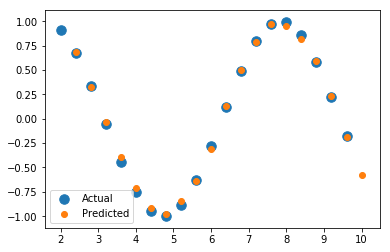

In [11]:
#data_time_steps為x軸,x.data.numpy為Y軸
pl.scatter(data_time_steps[:-1], x.data.numpy(), s=90, label="Actual") # s= 圈圈大小
pl.scatter(data_time_steps[1:], predictions, label="Predicted")
pl.legend()
pl.show()

In [ ]:
def forward(input, context_state, w1, w2):
  xh = torch.cat((input, context_state), 1) 
  context_state = torch.tanh(xh.mm(w1)) 
  out = context_state.mm(w2) 
  return  (out, context_state) 